# **Evaluation Factors Affecting Student Performance in High School**
- Final Project: Introduction to Machine Learning: Supervised Learning
- University of Colorado Boulder
- 08/02/2024

# Project Overview

## Introduction
Understanding the factors that affect student performance was crucial for educators and policymakers. By identifying these factors, interventions could be designed to improve educational outcomes. This study used a dataset from Kaggle to analyze various attributes that might influence students' performance in their academics.

## Objective
The objective of this study was to identify and analyze the key factors affecting student performance using machine learning models. By leveraging PyCaret, I trained and evaluated the performance of Random Forest model to understand the significance of each factor in predicting student GPA.


## Data
The dataset used in this study was sourced from Kaggle and contained several variables that described students' demographics, education-related activities, and their performance. Dataset link: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download 

| Category                  | Variable                  | Meaning                                                                          |
|---------------------------|---------------------------|----------------------------------------------------------------------------------|
| **Student Information**   | StudentID                 | A unique identifier assigned to each student (1001 to 3392).                     |
| **Demographic Details**   | Age                       | The age of the students ranges from 15 to 18 years.                              |
|                           | Gender                    | Gender of the students, where 0 represents Male and 1 represents Female.         |
|                           | Ethnicity                 | The ethnicity of the students, coded as follows: 0: Caucasian, 1: African American, 2: Asian, 3: Other. |
|                           | ParentalEducation         | The education level of the parents, coded as follows: 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher. |
| **Study Habits**          | StudyTimeWeekly           | Weekly study time in hours, ranging from 0 to 20.                                |
|                           | Absences                  | Number of absences during the school year, ranging from 0 to 30.                 |
|                           | Tutoring                  | Tutoring status, where 0 indicates No and 1 indicates Yes.                       |
| **Parental Involvement**  | ParentalSupport           | The level of parental support, coded as follows: 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High. |
| **Extracurricular Activities** | Extracurricular      | Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes. |
|                           | Sports                    | Participation in sports, where 0 indicates No and 1 indicates Yes.               |
|                           | Music                     | Participation in music activities, where 0 indicates No and 1 indicates Yes.     |
|                           | Volunteering              | Participation in volunteering, where 0 indicates No and 1 indicates Yes.         |
| **Academic Performance**  | GPA                       | Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities. |
| **Target Variable**       | GradeClass                | Classification of students' grades based on GPA: 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0). |


## Tools
The following tools were used for the analysis:

- **Python**: For data manipulation and machine learning.
- **PyCaret**: An open-source, low-code machine learning library in Python that automates machine learning workflows.
- **Jupyter Notebook**: For interactive data analysis and visualization.
- **Pandas**: For data manipulation and analysis.
- **Seaborn/Matplotlib**: For data visualization.


## Methodology
1. **Data Preprocessing**: The dataset was loaded and preprocessed to handle any missing values, encode categorical variables.
2. **Exploratory Data Analysis (EDA)**: Visualizations were performed to understand the distribution of variables and their relationships with student performance (GPA).
4. **Model Training and Evaluation**: 
    - Using PyCaret, multiple machine learning models were trained and evaluated.
    - The performance of each model was assessed using metrics such as R Squared and RMSE.
    - The best-performing model was selected based on these metrics.
5. **Results Interpretation**: The results of the RF model were interpreted to understand the significance of each factor affecting student performance.
6. **Conclusion and Recommendations**: Based on the findings, conclusions were drawn, and recommendations for educators and policymakers were provided.



# Module and data import

In [37]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
# Import the dataset
df = pd.read_csv('.\data\Student_performance_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Data preparations


In [39]:
# Check the missing values on the dataset
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [40]:
# Mapping for different categorical variables based on the data description
gender_map = {0: "Male", 1: "Female"}

ethnicity_map = {
    0: "Caucasian",
    1: "African American",
    2: "Asian",
    3: "Other"
}

parental_education_map = {
    0: "None",
    1: "High School",
    2: "Some College",
    3: "Bachelor's",
    4: "Higher"
}

tutoring_map = {0: "No", 1: "Yes"}

parental_support_map = {
    0: "None",
    1: "Low",
    2: "Moderate",
    3: "High",
    4: "Very High"
}

extracurricular_map = {0: "No", 1: "Yes"}

sports_map = {0: "No", 1: "Yes"}

music_map = {0: "No", 1: "Yes"}

volunteering_map = {0: "No", 1: "Yes"}

grade_class_map = {
    0: "A (GPA >= 3.5)",
    1: "B (3.0 <= GPA < 3.5)",
    2: "C (2.5 <= GPA < 3.0)",
    3: "D (2.0 <= GPA < 2.5)",
    4: "F (GPA < 2.0)"
}


In [41]:
# Apply the mapping to the dataset
df['Gender'] = df['Gender'].map(gender_map)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_map)
df['ParentalEducation'] = df['ParentalEducation'].map(parental_education_map)
df['Tutoring'] = df['Tutoring'].map(tutoring_map)
df['ParentalSupport'] = df['ParentalSupport'].map(parental_support_map)
df['Extracurricular'] = df['Extracurricular'].map(extracurricular_map)
df['Sports'] = df['Sports'].map(sports_map)
df['Music'] = df['Music'].map(music_map)
df['Volunteering'] = df['Volunteering'].map(volunteering_map)
df['GradeClass'] = df['GradeClass'].map(grade_class_map)

In [42]:
# Confirm the mappings
df.head(n=5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C (2.5 <= GPA < 3.0)
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B (3.0 <= GPA < 3.5)
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F (GPA < 2.0)
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D (2.0 <= GPA < 2.5)
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F (GPA < 2.0)


# Exploratory data analysis

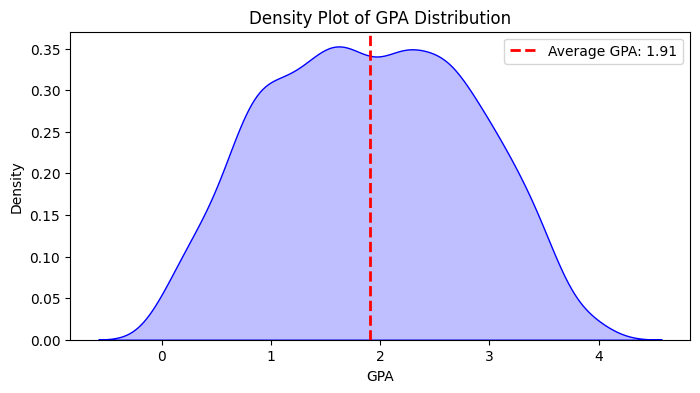

In [43]:
# Calculate the average GPA
average_gpa = df['GPA'].mean()

# Create a density plot of the GPA distribution
plt.figure(figsize=(8, 4))
sns.kdeplot(df['GPA'], fill=True, color='blue')
plt.axvline(average_gpa, color='red', linestyle='dashed', linewidth=2, label=f'Average GPA: {average_gpa:.2f}')
plt.title('Density Plot of GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.legend()
plt.show()


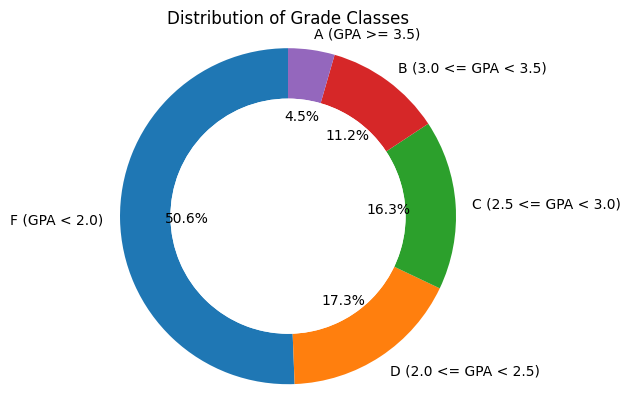

In [44]:
# Count the occurrences of each GradeClass
grade_class_counts = df['GradeClass'].value_counts()
# Plotting the doughnut chart
fig, ax = plt.subplots()
# Create a pie chart
wedges, texts, autotexts = ax.pie(grade_class_counts, labels=grade_class_counts.index, 
                                  autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
# Add a white circle at the center to create a doughnut plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
# Add a title
plt.title('Distribution of Grade Classes')
# Display the plot
plt.show()

In [45]:
# Function to plot the density distribution of GPA for each category
def plot_gpa_density_subplots(data, categories):
    num_categories = len(categories)
    fig, axes = plt.subplots(num_categories, 1, figsize=(8, 4 * num_categories))
    
    for i, category in enumerate(categories):
        sns.kdeplot(data=data, x='GPA', hue=category, fill=True, ax=axes[i])
        
        # Calculate and plot the average GPA for each category
        category_means = data.groupby(category)['GPA'].mean()
        palette = sns.color_palette(n_colors=len(category_means))
        colors = {cat: palette[idx] for idx, cat in enumerate(category_means.index)}
        
        for cat_value, mean_gpa in category_means.items():
            axes[i].axvline(mean_gpa, color=colors[cat_value], linestyle='dotted', linewidth=2, label=f'Avg GPA: {cat_value}')
        
        legend = axes[i].legend(title=category)
        plt.setp(legend.get_texts(), fontsize='8')  # Reduce legend font size
        
        axes[i].set_title(f'GPA Density Distribution by {category}')
        axes[i].set_xlabel('GPA')
        axes[i].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

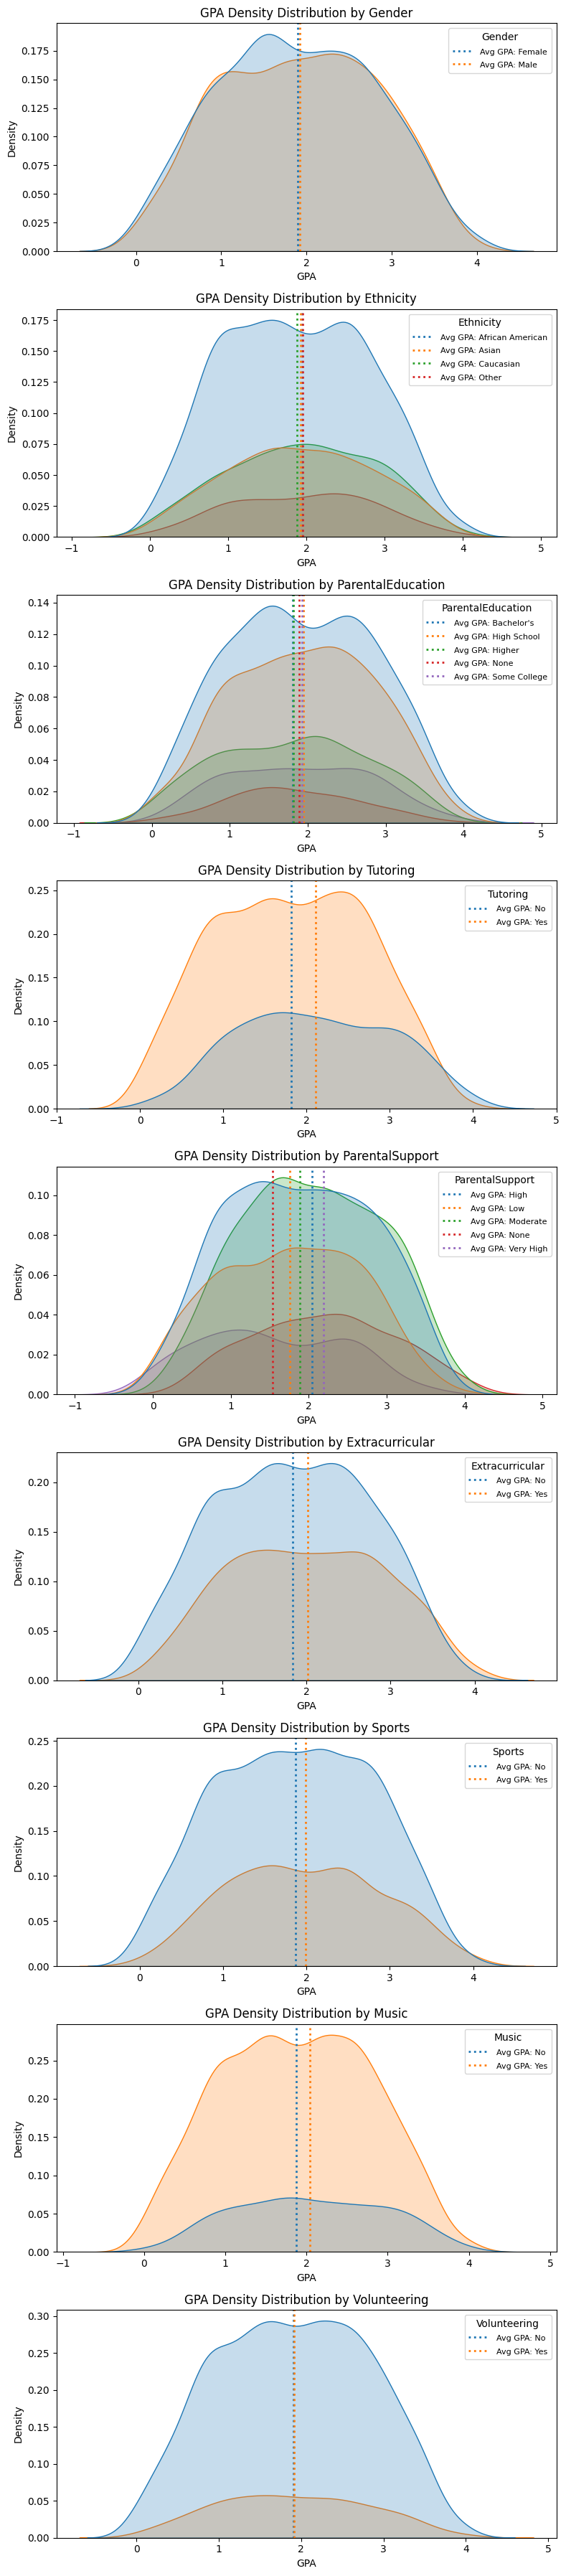

In [46]:
# Plot the GPA density distribution by Category
# List of categorical variables to plot
categorical_variables = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Plot GPA density distribution subplots
plot_gpa_density_subplots(df, categorical_variables)

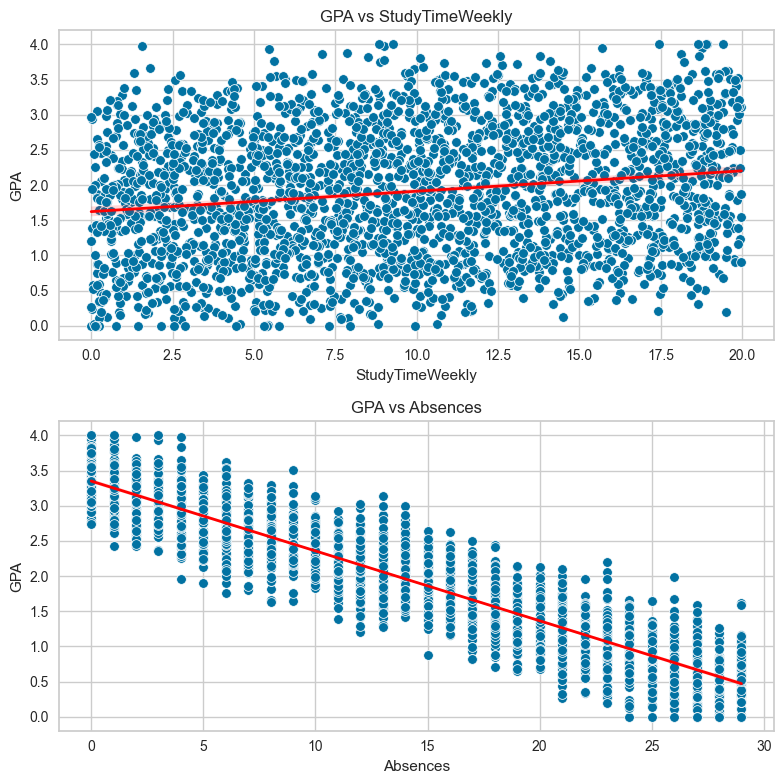

In [59]:
# Explore the relationship between GPA and the continuous variables
def plot_gpa_scatter_subplots(data, continuous_vars):
    num_vars = len(continuous_vars)
    fig, axes = plt.subplots(num_vars, 1, figsize=(8, 4 * num_vars))
    
    for i, var in enumerate(continuous_vars):
        sns.scatterplot(data=data, x=var, y='GPA', ax=axes[i])
        sns.regplot(data=data, x=var, y='GPA', ax=axes[i], 
                    scatter=False, color='red', line_kws={'linewidth': 2})
        axes[i].set_title(f'GPA vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('GPA')

    plt.tight_layout()
    plt.show()


# List of continuous variables to plot
continuous_variables = ['StudyTimeWeekly', 'Absences']

# Plot GPA scatter plot subplots
plot_gpa_scatter_subplots(df, continuous_variables)

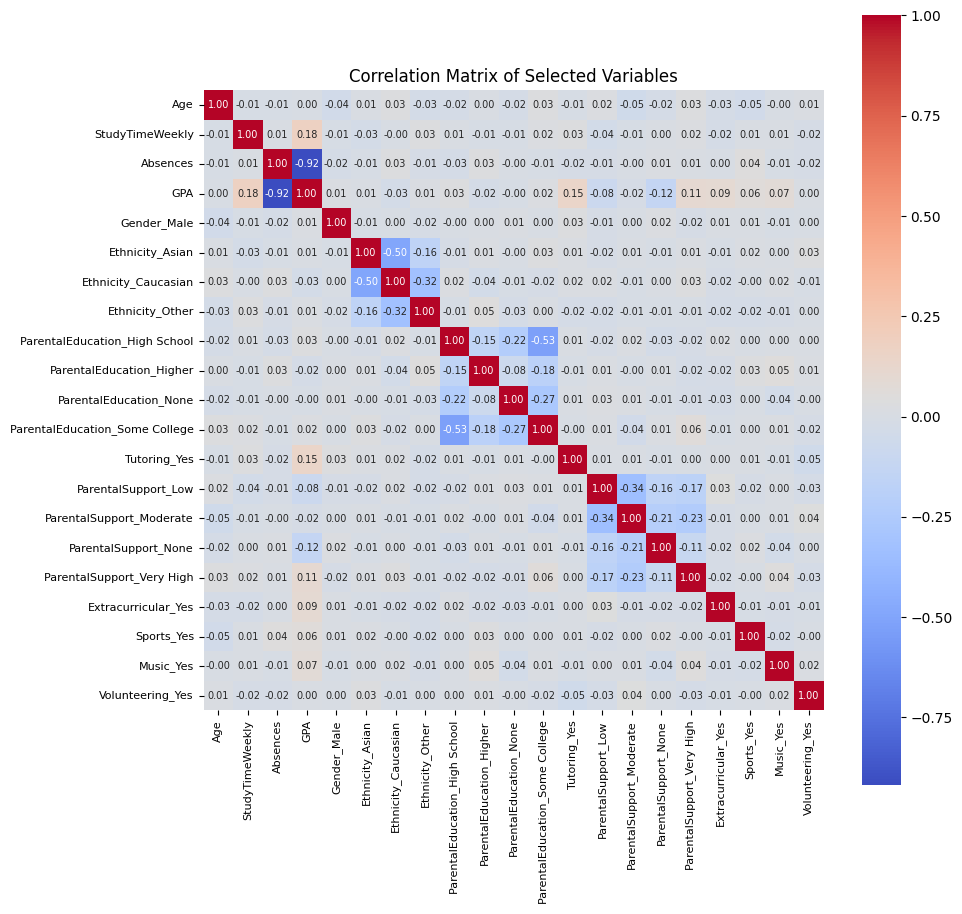

In [48]:
# Correlaton matrix
# Select the relevant columns
columns = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
           'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
           'Music', 'Volunteering', 'GPA']

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df[columns], drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_dummies.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm', 
            cbar=True, square=True, annot_kws={"size": 7})
plt.title('Correlation Matrix of Selected Variables')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Data modeling

In [49]:
# Select the relevant columns for modeling exclude StudentID and GradeClass
model_data = df.drop(columns=['StudentID', 'GradeClass'])

In [50]:
# Pycaret initial setup
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data=model_data, target='GPA', fold=10, session_id=123)

,Description,Value
0,Session id,123
1,Target,GPA
2,Target type,Regression
3,Original data shape,"(2392, 13)"
4,Transformed data shape,"(2392, 24)"
5,Transformed train set shape,"(1674, 24)"
6,Transformed test set shape,"(718, 24)"
7,Numeric features,3
8,Categorical features,9
9,Preprocess,True


In [51]:
# Fit random foret model
rf_model = s.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1877,0.0555,0.2356,0.9257,0.0913,0.1306
1,0.1957,0.0607,0.2463,0.9368,0.1041,0.1929
2,0.2048,0.0698,0.2642,0.9178,0.1249,0.2117
3,0.1918,0.0548,0.2342,0.9332,0.1003,0.3511
4,0.1993,0.0618,0.2486,0.9321,0.0963,0.1468
5,0.2186,0.0684,0.2615,0.8982,0.0946,0.1445
6,0.1938,0.0629,0.2508,0.9270,0.1041,0.1895
7,0.2104,0.0693,0.2632,0.9140,0.1055,0.1873
8,0.1972,0.0619,0.2488,0.9253,0.1045,0.2830


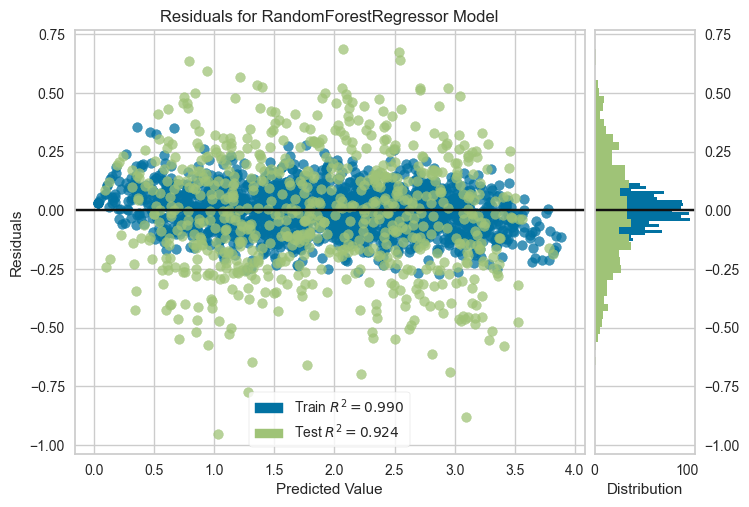

In [52]:
# Plot residuals
s.plot_model(rf_model, plot='residuals')

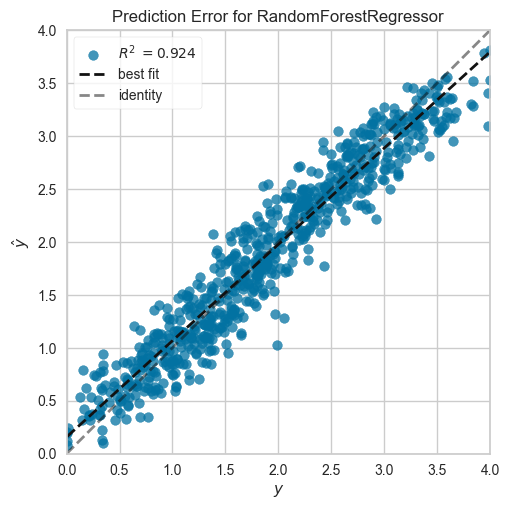

In [53]:
# Plot error
s.plot_model(rf_model, plot='error')

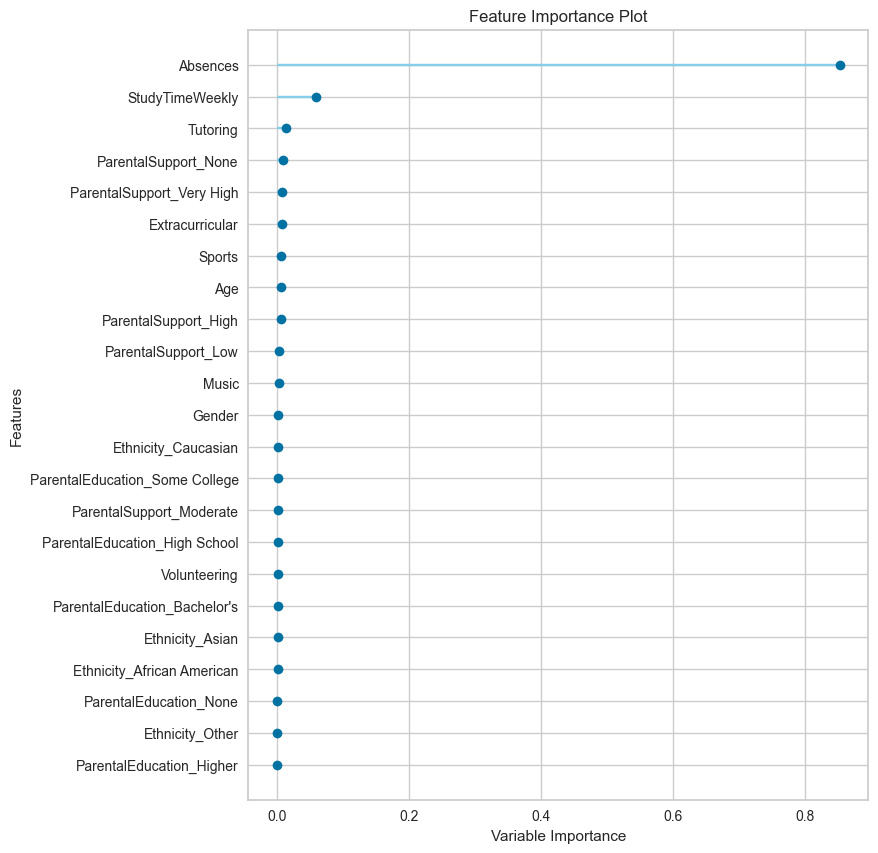

In [54]:
# Plot feature importance
s.plot_model(rf_model, plot='feature_all')

# Conclusion

## Findings from Exploratory Data Analysis

1. **GPA vs. Absences**:
    - There is a strong negative correlation between the number of absences and GPA.
    - Higher absences are associated with significantly lower GPAs.
    - **Policy Implication**: Reducing student absences could significantly improve academic performance.

2. **Weekly study time**:
    - There is a slight positive correlation between weekly study time and GPA.
    - Increased study time is associated with higher GPAs, though the correlation is not as strong as with absences.
    - **Policy Implication**: Encouraging regular study habits could positively impact academic performance.

3. **Parental Support**:
    - Higher levels of parental support are correlated with higher GPAs.
    - Students with very high parental support tend to perform better academically.
    - **Policy Implication**: Promoting parental involvement in education can enhance student performance.

## Findings from Model Training and Evaluation

1. **Random Forest Regressor Performance**:
    - The Random Forest model shows a high R² value (0.924), indicating a strong fit.
    - The predicted values are closely aligned with the actual values, suggesting good model performance.

2. **Feature Importance**:
    - **Absences**: The most important feature affecting GPA.
    - **Weekly study time in hours**: Significant positive impact on GPA.
    - **Tutoring**: Notable positive influence on GPA.
    - **Parental Support**: Higher levels of support are associated with better academic performance.
    - **Policy Implication**: Policies aimed at reducing absences, encouraging regular study habits, providing tutoring support, and promoting parental involvement can effectively enhance student performance.